In [ ]:
from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My Drive/Google colab Save/kaggle/0.doc_for_me

Mounted at /content/drive
/content/drive/My Drive/Google colab Save/kaggle/0.doc_for_me


- Convolution Neural Network
  - Input > Extract(Head) > Classify(Class) > Output
  - Extract features and Classify with them
    - Transefer Model : REUSE Old Heads and Classes to improve the performance of model

## Flatten
- layers.Flatten()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
)

In [ ]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

## CNN with Relu and Pool
- Filter
  - Filter :: filter images for particular feature (Convolution)
  - Detect :: detect features from filter images (Relu)
  - Condense :: enhance the features (Max Pooling)

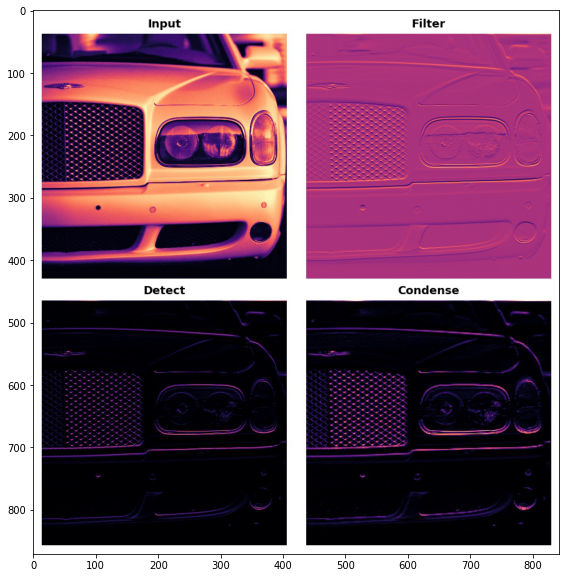

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('data/CNN.jpeg')
plt.figure(figsize=(10,10))
plt.imshow(img)

In [ ]:
model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3), # activation is None
    # More layers follow
])

### Convolution
- kernel :: the WEIGHTS for filtering
  - 학습하고 싶은 것
  - 3*3 or 5*5 ...
  - emphasize certain patterns of information
    - 반전, 색변화, 세로선, 가로선, 곡선 ...

- filters :: how many kernel

- Activation :: the result of kernel >> feature map
  - according to the shape and variable of kernel,
  - the results of convolution show different images having particular feature

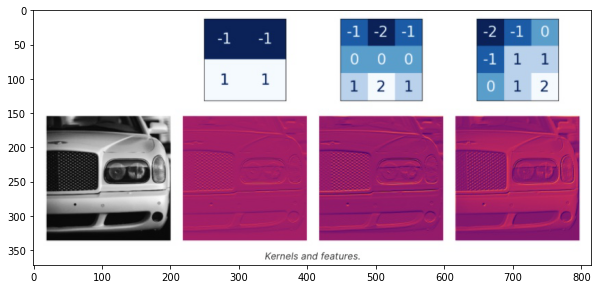

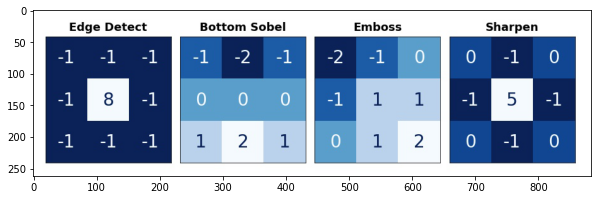

In [ ]:
img = mpimg.imread('data/CNN_1.jpeg')
plt.figure(figsize=(10,5))
plt.imshow(img)


img = mpimg.imread('data/CNN_3.jpeg')
plt.figure(figsize=(10,5))
plt.imshow(img)

### Relu
- Activation in Convolution
- it's an unlinear

In [ ]:
model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, activatoin='relu'), # activation is None
    # More layers follow
])

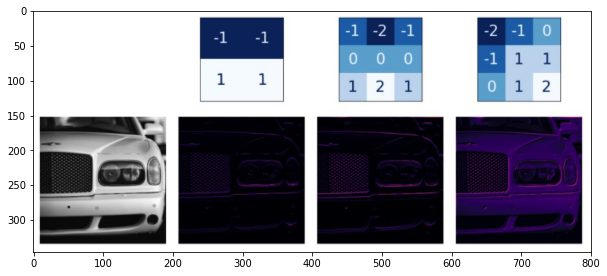

In [ ]:
img = mpimg.imread('data/CNN_2.jpeg')
plt.figure(figsize=(10,5))
plt.imshow(img)

### Maximum pooling
- after doing relu : there ars so many dead space (0, black)
- Maximum pooling
  - replace dead space into maximum value
- 하지만 반복하면 가까운 거리에 있는 차이들이 사라진다
  - translation invariance

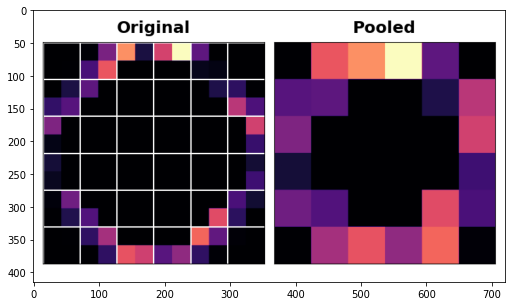

In [ ]:
img = mpimg.imread('data/CNN_4.png')
plt.figure(figsize=(10,5))
plt.imshow(img)

### AvgPooling
- 하나의 feature map을 평균으로 만들어버린다.
- feature map들은 하나의 특징
  - 바퀴가 있나,,, 산이 있나,, 사람이 있나... 원이 있나...
- 을 표현하고 있는데..
- 있으면 흰색.. 없으면 검정색으로 만들어 버리는 pooling으로 
- 계산을 단순하게 해주는.. 장점이 있을수도 있다.


## slide
- stride and window
- convolution에서는 1을 선호
  - 정보를 놓치고 싶지 않다.
- pooling에서는 좀더 크게 하는 경우도 있다. (윈도우보다는 크지 않게)

## padding
- 크기를 유지

## Data Augmentation
- the more dataset, the better performance
- random transfromation such as rotation the ori_image or adjusting color
- but we can't say it always work well

In [ ]:
# all of the "factor" parameters indicate a percent-change
augment = keras.Sequential([
    # preprocessing.RandomContrast(factor=0.5),
    preprocessing.RandomFlip(mode='horizontal'), # meaning, left-to-right
    # preprocessing.RandomFlip(mode='vertical'), # meaning, top-to-bottom
    # preprocessing.RandomWidth(factor=0.15), # horizontal stretch
    # preprocessing.RandomRotation(factor=0.20),
    # preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
])


ex = next(iter(ds_train.unbatch().map(lambda x, y: x).batch(1)))

plt.figure(figsize=(10,10))
for i in range(16):
    image = augment(ex, training=True)
    plt.subplot(4, 4, i+1)
    plt.imshow(tf.squeeze(image))
    plt.axis('off')
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.InputLayer(input_shape=[128, 128, 3]),
    
    # Data Augmentation
    preprocessing.RandomContrast(factor=0.10),
    preprocessing.RandomFlip(mode='horizontal'),
    preprocessing.RandomRotation(factor=0.10),

    # Block One
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Two
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Head
    layers.BatchNormalization(renorm=True),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=50,
)

# Plot learning curves
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

## 잡지식

### image conver

In [ ]:
# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.computer_vision.ex2 import *

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# show image
image_path = '../input/computer-vision-resources/car_illus.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[400, 400])

img = tf.squeeze(image).numpy()
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show();

# Reformat for batch compatibility.
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

### filtered image show

In [ ]:
import tensorflow as tf

image_condense = tf.nn.pool(
    input=image_detect, # image in the Detect step above
    window_shape=(2, 2),
    pooling_type='MAX',
    # we'll see what these do in the next lesson!
    strides=(2, 2),
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.show();

NameError: ignored